In [1]:
import gillespie
import numpy as np
import matplotlib.pyplot as plt

# Basic setting

In [2]:
propensities = [
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k1'] * Sig * MKKK) 
         / (params_dict['K1'] + MKKK),            
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k2'] * P1 * MKKK_P / params_dict['K2']) 
         / (1 + MKKK_P / params_dict['K2'] + MKKK / params_dict['Kse1']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k3'] * MKKK_P * MKK / params_dict['K3']) 
         / (1 + MKK / params_dict['K3'] + MKK_P / params_dict['K4']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k4'] * MKKK_P * MKK_P / params_dict['K4']) 
         / (1 + MKK / params_dict['K3'] + MKK_P / params_dict['K4']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k5'] * P2 * MKK_PP / params_dict['K5']) 
         / (1 + MKK_PP / params_dict['K5'] + MKK_P / params_dict['K6'] + MKK / params_dict['Kse2']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k6'] * P2 * MKK_P / params_dict['K6']) 
         / (1 + MKK_PP / params_dict['K5'] + MKK_P / params_dict['K6'] + MKK / params_dict['Kse2']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k7'] * MKK_PP * MK / params_dict['K7']) 
         / (1 + MK / params_dict['K7'] + MK_P / params_dict['K8']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k8'] * MKK_PP * MK_P / params_dict['K8']) 
         / (1 + MK / params_dict['K7'] + MK_P / params_dict['K8']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k9'] * P3 * MK_PP / params_dict['K9']) 
         / (1 + MK / params_dict['K9'] + MK_P / params_dict['K10'] + MK_PP / params_dict['Kse3']),
    lambda MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig: 
        (params_dict['k10'] * P3 * MK_P / params_dict['K10']) 
         / (1 + MK / params_dict['K9'] + MK_P / params_dict['K10'] + MK_PP / params_dict['Kse3'])]
stoichiometry = [[-1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0]]
params_dict = {'K1': 30, 
               'K2': 30, 
               'Kse1': 30, 
               'Kse2': 30, 
               'Kse3': 30, 
               'K3': 30, 
               'K4': 30, 
               'K5': 30, 
               'K6': 30, 
               'K7': 30, 
               'K8': 30, 
               'K9': 30, 
               'K10': 30, 
               'k1': 0.2, 
               'k2': 0.01, 
               'k3': 0.1, 
               'k4': 0.1, 
               'k5': 0.1, 
               'k6': 0.1, 
               'k7': 0.1, 
               'k8': 0.1, 
               'k9': 0.1, 
               'k10': 0.1}

# Figure 2

In [7]:
initial_state = [9000, 0, 36000, 0, 0, 36000, 0, 0, 3000, 3000, 6000, 300]

t, measurements = gillespie.simulate(initial_state, propensities, stoichiometry, duration=500)
MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig = zip(*measurements)

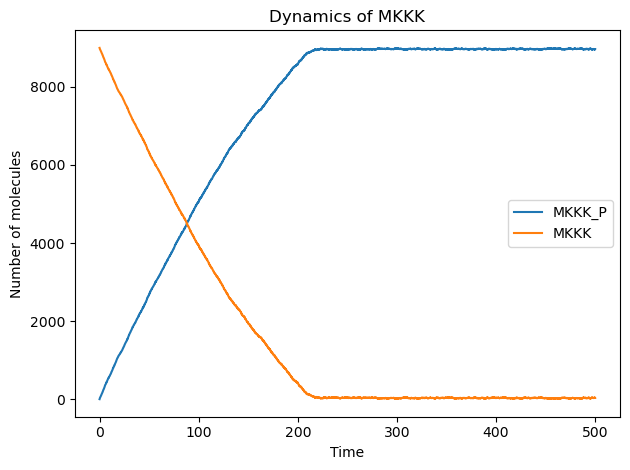

In [18]:
plt.plot(t, MKKK_P, label="MKKK_P")
plt.plot(t, MKKK, label='MKKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig2a.png')

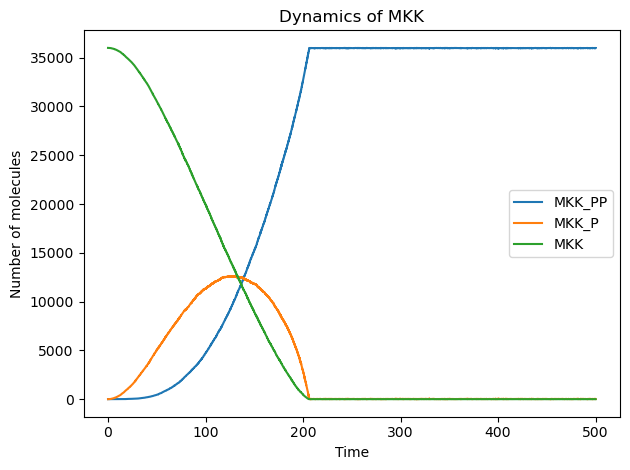

In [19]:
plt.plot(t, MKK_PP, label='MKK_PP')
plt.plot(t, MKK_P, label="MKK_P")
plt.plot(t, MKK, label='MKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig2b.png')

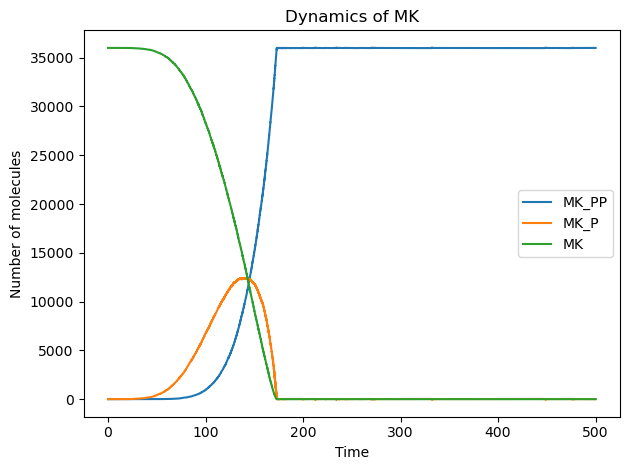

In [20]:
plt.plot(t, MK_PP, label='MK_PP')
plt.plot(t, MK_P, label="MK_P")
plt.plot(t, MK, label='MK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig2c.png')

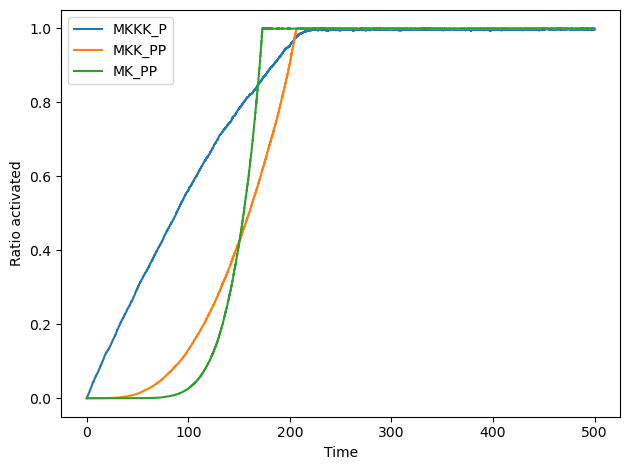

In [21]:
plt.plot(t, np.array(MKKK_P) / 9000, label="MKKK_P")
plt.plot(t, np.array(MKK_PP) / 36000, label="MKK_PP")
plt.plot(t, np.array(MK_PP) / 36000, label='MK_PP')
plt.xlabel('Time')
plt.ylabel('Ratio activated')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig2d.png')

# Figure 3

In [55]:
initial_state = [9000, 0, 36000, 0, 0, 36000, 0, 0, 3000, 3000, 6000, 120]

t, measurements = gillespie.simulate(initial_state, propensities, stoichiometry, duration=2000)
MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig = zip(*measurements)

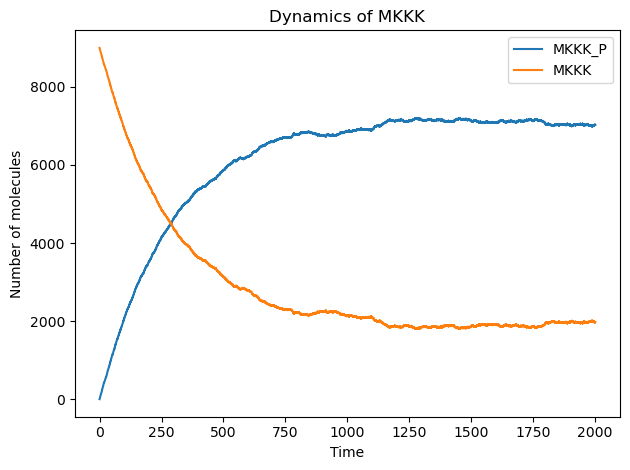

In [56]:
plt.plot(t, MKKK_P, label="MKKK_P")
plt.plot(t, MKKK, label='MKKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig3a.png')

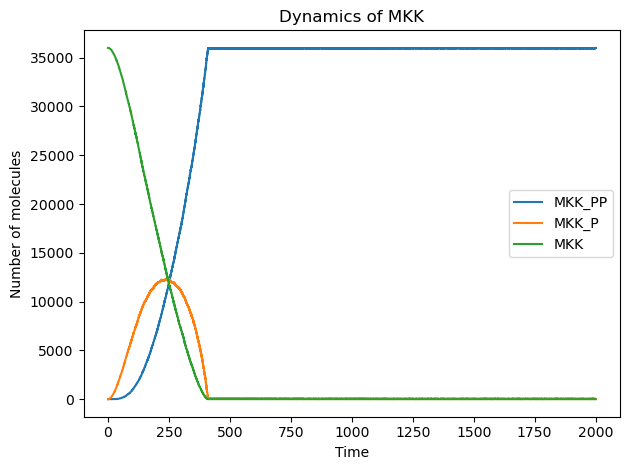

In [57]:
plt.plot(t, MKK_PP, label='MKK_PP')
plt.plot(t, MKK_P, label="MKK_P")
plt.plot(t, MKK, label='MKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig3b.png')

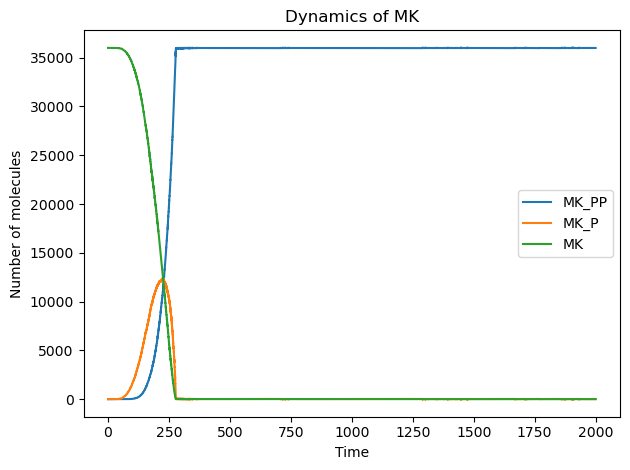

In [58]:
plt.plot(t, MK_PP, label='MK_PP')
plt.plot(t, MK_P, label="MK_P")
plt.plot(t, MK, label='MK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig3c.png')

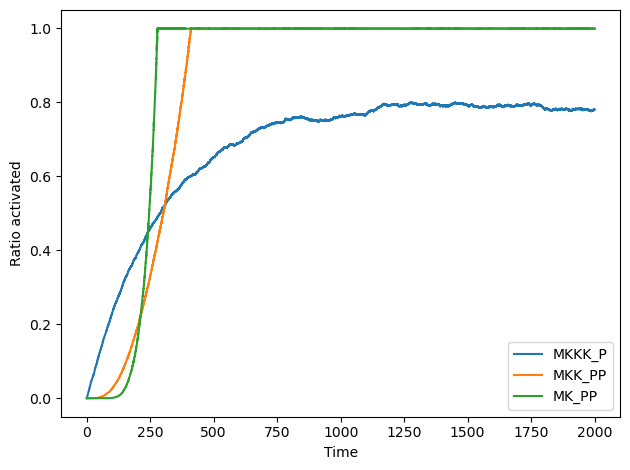

In [59]:
plt.plot(t, np.array(MKKK_P) / 9000, label="MKKK_P")
plt.plot(t, np.array(MKK_PP) / 36000, label="MKK_PP")
plt.plot(t, np.array(MK_PP) / 36000, label='MK_PP')
plt.xlabel('Time')
plt.ylabel('Ratio activated')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig3d.png')

# Figure 4

In [60]:
initial_state = [9000, 0, 36000, 0, 0, 36000, 0, 0, 3000, 3000, 6000, 50]

t, measurements = gillespie.simulate(initial_state, propensities, stoichiometry, duration=2000)
MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig = zip(*measurements)

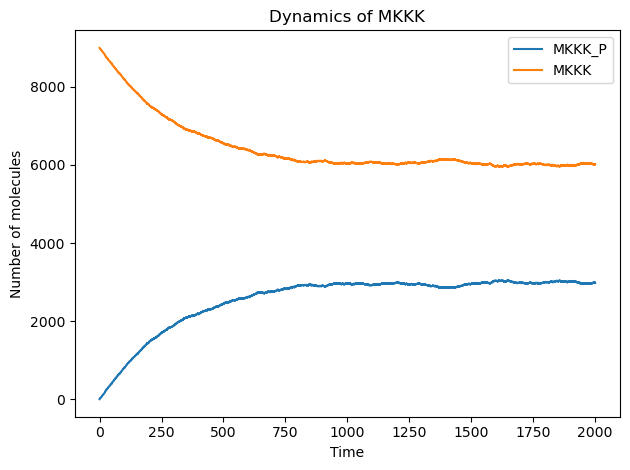

In [61]:
plt.plot(t, MKKK_P, label="MKKK_P")
plt.plot(t, MKKK, label='MKKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig4a.png')

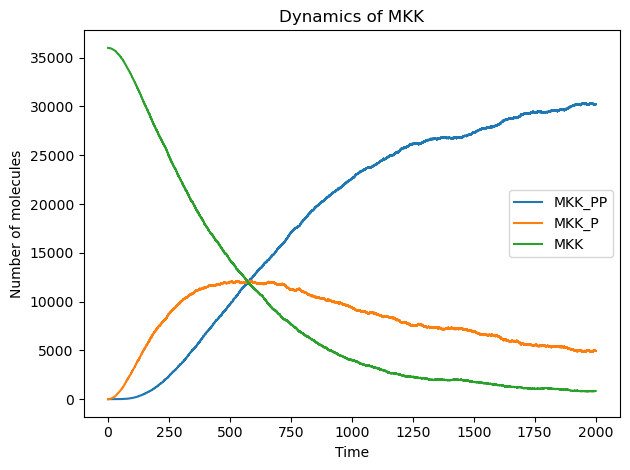

In [62]:
plt.plot(t, MKK_PP, label='MKK_PP')
plt.plot(t, MKK_P, label="MKK_P")
plt.plot(t, MKK, label='MKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig4b.png')

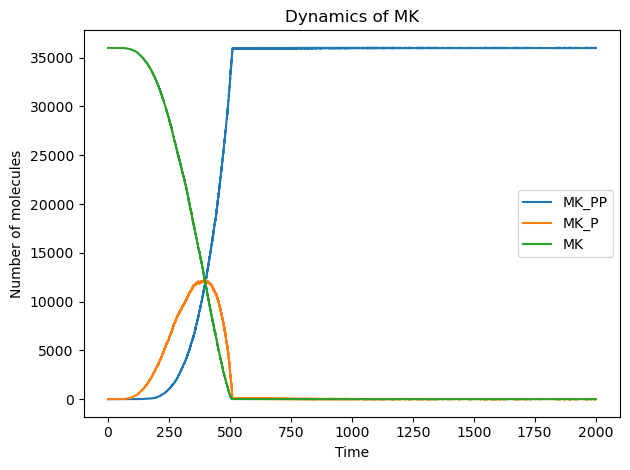

In [63]:
plt.plot(t, MK_PP, label='MK_PP')
plt.plot(t, MK_P, label="MK_P")
plt.plot(t, MK, label='MK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig4c.png')

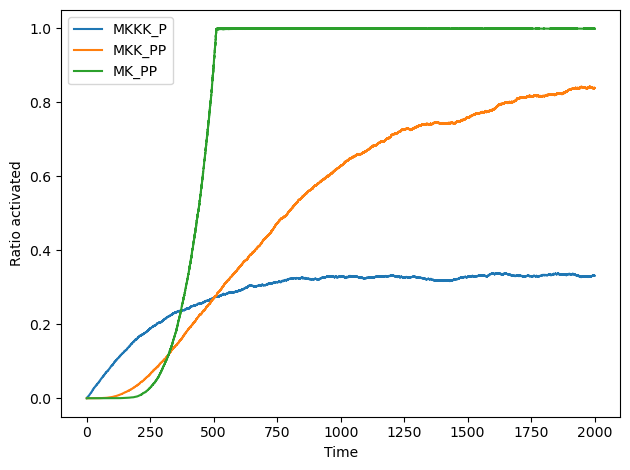

In [64]:
plt.plot(t, np.array(MKKK_P) / 9000, label="MKKK_P")
plt.plot(t, np.array(MKK_PP) / 36000, label="MKK_PP")
plt.plot(t, np.array(MK_PP) / 36000, label='MK_PP')
plt.xlabel('Time')
plt.ylabel('Ratio activated')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig4d.png')

# Figure 5

In [65]:
initial_state = [9000, 0, 36000, 0, 0, 36000, 0, 0, 3000, 3000, 6000, 20]

t, measurements = gillespie.simulate(initial_state, propensities, stoichiometry, duration=2000)
MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig = zip(*measurements)

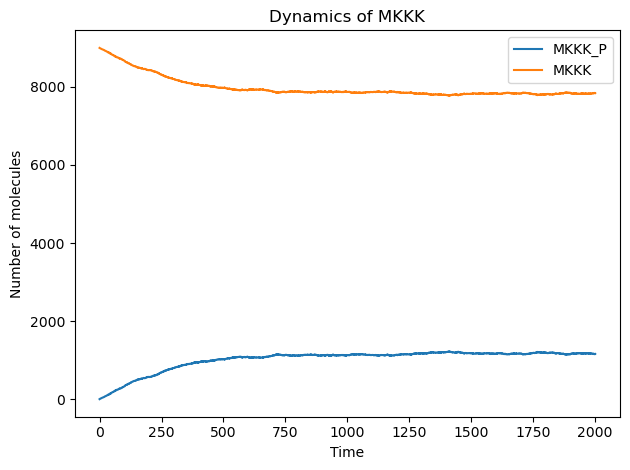

In [66]:
plt.plot(t, MKKK_P, label="MKKK_P")
plt.plot(t, MKKK, label='MKKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig5a.png')

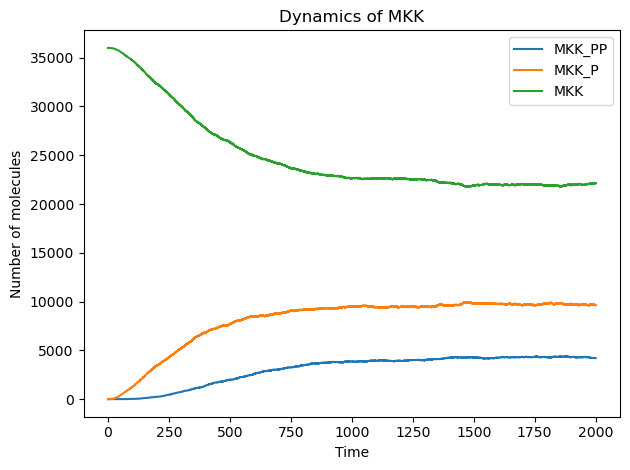

In [67]:
plt.plot(t, MKK_PP, label='MKK_PP')
plt.plot(t, MKK_P, label="MKK_P")
plt.plot(t, MKK, label='MKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig5b.png')

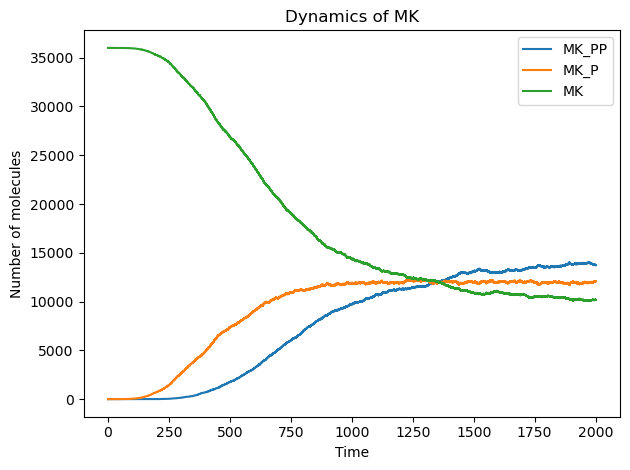

In [68]:
plt.plot(t, MK_PP, label='MK_PP')
plt.plot(t, MK_P, label="MK_P")
plt.plot(t, MK, label='MK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig5c.png')

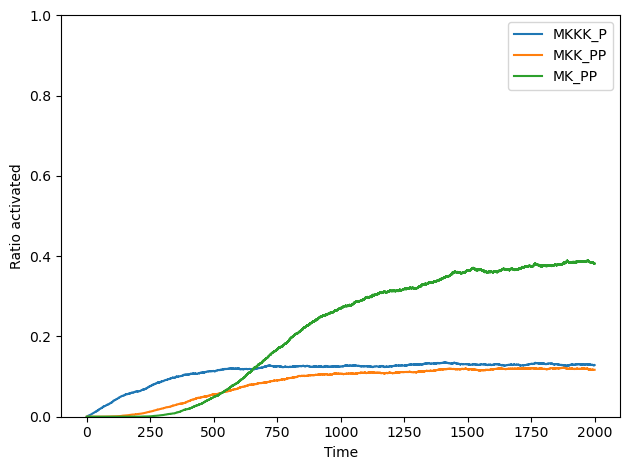

In [71]:
plt.plot(t, np.array(MKKK_P) / 9000, label="MKKK_P")
plt.plot(t, np.array(MKK_PP) / 36000, label="MKK_PP")
plt.plot(t, np.array(MK_PP) / 36000, label='MK_PP')
plt.xlabel('Time')
plt.ylabel('Ratio activated')
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig5d.png')

# Figure 6

In [3]:
initial_state = [30, 0, 120, 0, 0, 120, 0, 0, 10, 10, 20, 1]

t, measurements = gillespie.simulate(initial_state, propensities, stoichiometry, duration=2000)
MKKK, MKKK_P, MKK, MKK_P, MKK_PP, MK, MK_P, MK_PP, P1, P2, P3, Sig = zip(*measurements)

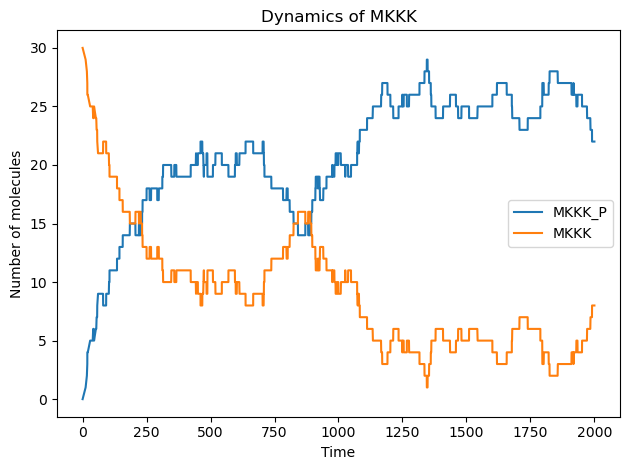

In [9]:
plt.plot(t, MKKK_P, label="MKKK_P")
plt.plot(t, MKKK, label='MKKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig6a.png')

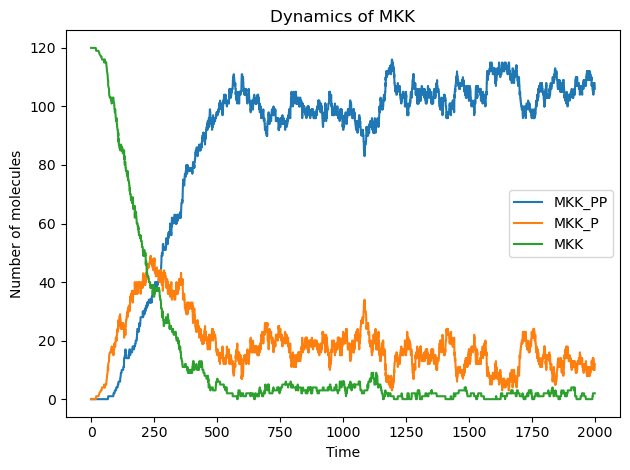

In [10]:
plt.plot(t, MKK_PP, label='MKK_PP')
plt.plot(t, MKK_P, label="MKK_P")
plt.plot(t, MKK, label='MKK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MKK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig6b.png')

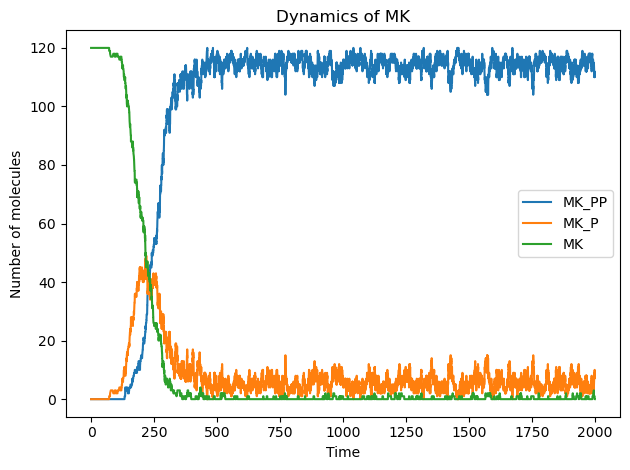

In [11]:
plt.plot(t, MK_PP, label='MK_PP')
plt.plot(t, MK_P, label="MK_P")
plt.plot(t, MK, label='MK')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Dynamics of MK')
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig6c.png')

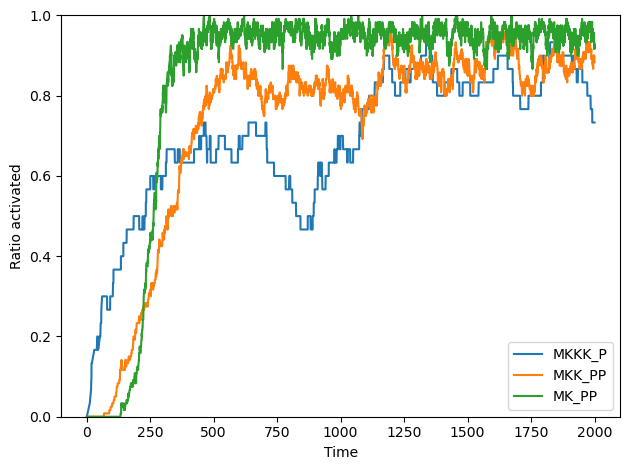

In [12]:
plt.plot(t, np.array(MKKK_P) / 30, label="MKKK_P")
plt.plot(t, np.array(MKK_PP) / 120, label="MKK_PP")
plt.plot(t, np.array(MK_PP) / 120, label='MK_PP')
plt.xlabel('Time')
plt.ylabel('Ratio activated')
plt.ylim(0, 1)
plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig('Fig6d.png')